# GLOBAL MORTALITY ANALYSIS 

## Introduction

Understanding the leading causes of death worldwide sheds light on global health challenges and helps prioritize actions for better outcomes. Our project analyzes mortality trends from 2015 to 2019, focusing on critical causes like cardiovascular diseases, nutritional deficiencies, substance abuse, and deaths related to conflict. These topics were chosen for their widespread impact and relevance to global populations.

Through our visualizations, we aim to uncover patterns and correlations in the data—highlighting mental health concerns like the link between alcohol use disorders and self-harm and emphasizing urgent issues such as food insecurity and malnutrition. Alongside this, we also encourage viewers to reflect on lifestyle choices and consider what actions they can take to prevent avoidable health risks and improve longevity.

This analysis is for policymakers, healthcare professionals, and anyone passionate about improving global health. Our goal is to inspire data-driven strategies and encourage healthier lives for all.

## Data Description

The data for this project was sourced from the Kaggle dataset titled "Cause of Deaths around the World (Historical Data)" (2024, February 12), available at: https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world, 

This dataset contains historical mortality data from 1990 to 2019, detailing the number of deaths caused by various diseases and external factors across different countries.

## Guiding Questions

### 1. Trends in Leading Causes of Death Globally
**Guiding Questions:** What are the leading causes of death globally (2015–2019)? How have they changed over time?  
**Reasoning:** This analysis identifies the primary causes of global mortality and examines their trends, providing insights for global health strategies.

### 2. Correlation between Alcohol Use Disorders and Self-harm
**Guiding Questions:** Is there a relationship between alcohol use disorders and self-harm?
**Reasoning:** This exploration examines the potential link between alcohol use disorders and self-harm, offering insights for mental health and addiction prevention efforts.

### 3. Top 5 Countries by Deaths Due to Nutritional Deficiencies & Malnutrition
**Guiding Questions:** Which countries have the highest deaths from nutritional deficiencies? How do they compare?  
**Reasoning:** Identifying the most affected countries helps prioritize resources and interventions to address malnutrition and food insecurity.

### 4. Yearly Trend of Deaths from Substance Abuse (All Countries and Canada)
**Guiding Questions:** How have deaths from substance abuse changed globally and in Canada (2015–2019)? How do drug and alcohol use compare?  
**Reasoning:** Tracking global and Canada-specific trends in substance abuse deaths provides valuable insights for public health policies and interventions.

### 5. Yearly Deaths from Conflict and Terrorism (Top 5 Countries)
**Guiding Questions:** Which countries have the highest deaths from conflict and terrorism? How have these deaths changed over time?  
**Reasoning:** This analysis highlights the impact of conflict and terrorism on mortality, emphasizing the need for peace-building and humanitarian efforts.

### Importing packages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import geopandas as gpd

### Filtering Data from 2015-2019

In [9]:
file_path = "cause_of_deaths.csv"
df = pd.read_csv(file_path)

filtered_df = df[df['Year'].between(2015, 2019)]

### Trends in Leading Causes of Death Globally

Top 5 Causes of Death Globally: ['Cardiovascular Diseases', 'Neoplasms', 'Chronic Respiratory Diseases', 'Lower Respiratory Infections', 'Digestive Diseases']


C:\Users\Juan\AppData\Local\Temp\ipykernel_4576\1111885422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Year'].astype(int)


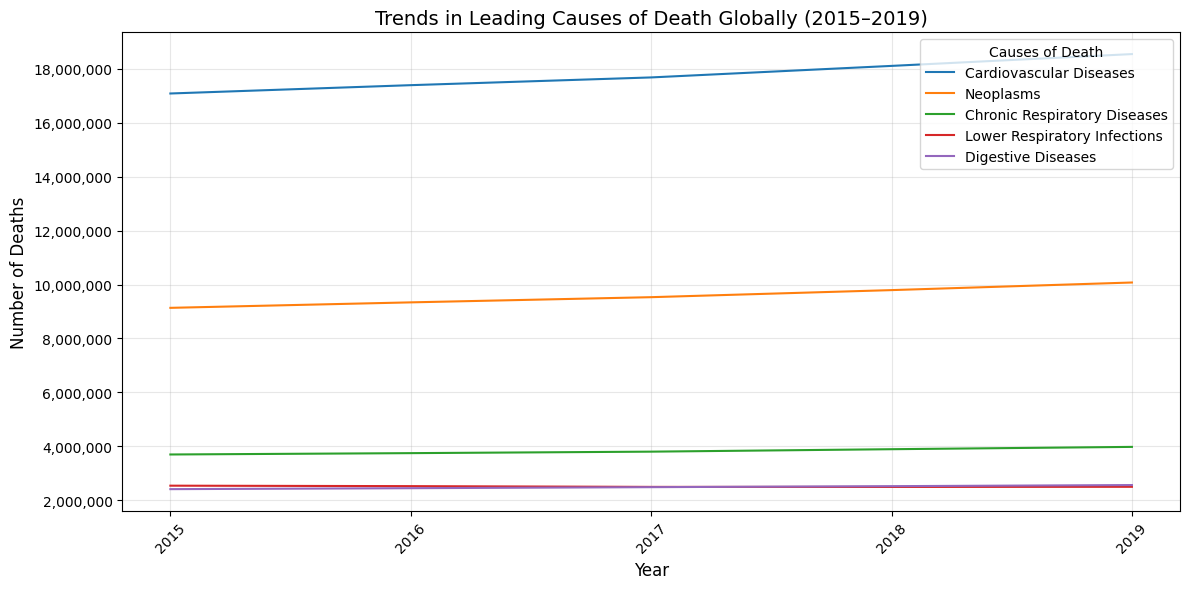

In [9]:
filtered_df['Year'] = filtered_df['Year'].astype(int)


non_cause_columns = ['Country/Territory', 'Code', 'Year']
cause_columns = [col for col in filtered_df.columns if col not in non_cause_columns]


global_deaths_by_cause = filtered_df.groupby('Year')[cause_columns].sum()


top_causes = global_deaths_by_cause.sum().sort_values(ascending=False).head(5).index
print(f"Top 5 Causes of Death Globally: {list(top_causes)}")


top_causes_data = global_deaths_by_cause[top_causes]


def format_func(value, tick_number):
    return f"{int(value):,}"

formatter = FuncFormatter(format_func)


plt.figure(figsize=(12, 6))
for cause in top_causes:
    plt.plot(top_causes_data.index, top_causes_data[cause], label=cause)

plt.title("Trends in Leading Causes of Death Globally (2015–2019)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.gca().yaxis.set_major_formatter(formatter)  
plt.xticks(global_deaths_by_cause.index, rotation=45)  
plt.legend(title="Causes of Death", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Trends in Leading Causes of Death Globally

Top 5 Countries for Self-Harm Incidents:
Country/Territory
India            930033
China            605737
United States    231859
Russia           205934
Japan            126316
Name: Self-harm, dtype: int64


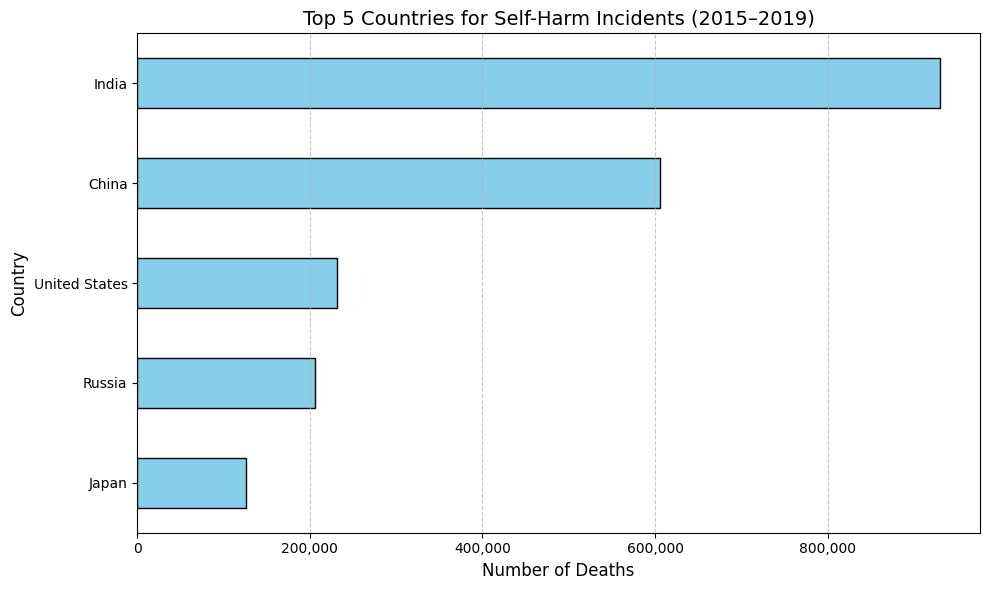

In [70]:
self_harm_by_country = filtered_df.groupby('Country/Territory')['Self-harm'].sum()

top_5_self_harm_countries = self_harm_by_country.sort_values(ascending=False).head()
print(f"Top 5 Countries for Self-Harm Incidents:\n{top_5_self_harm_countries}")

formatter = FuncFormatter(format_func)

plt.figure(figsize=(10, 6))
top_5_self_harm_countries.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title("Top 5 Countries for Self-Harm Incidents (2015–2019)", fontsize=14)
plt.xlabel("Number of Deaths", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.gca().xaxis.set_major_formatter(formatter)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

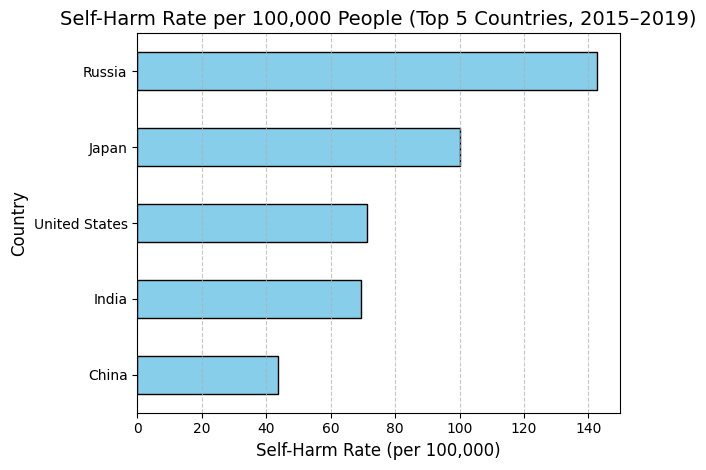

In [25]:
self_harm_by_country = filtered_df.groupby('Country/Territory')['Self-harm'].sum()

top_5_self_harm_countries = self_harm_by_country.sort_values(ascending=False).head(5)

average_population = {
    'India': 1338403826,
    'China': 1387617364,
    'United States': 324820206,
    'Russia': 144364014,
    'Japan': 126044833
}

df_avg_population = pd.DataFrame(list(average_population.items()), columns=['Country/Territory', 'Average Population'])


df_top_5 = pd.merge(top_5_self_harm_countries.reset_index(), df_avg_population, on='Country/Territory', how='left')


df_top_5['Self-harm Rate (per 100,000)'] = (df_top_5['Self-harm'] / df_top_5['Average Population']) * 100000


def format_func(value, tick_number):
    return f"{int(value):,}"

formatter = FuncFormatter(format_func)

plt.figure(figsize=(10, 6))
df_top_5.sort_values('Self-harm Rate (per 100,000)').plot(
    kind='barh', 
    x='Country/Territory', 
    y='Self-harm Rate (per 100,000)', 
    color='skyblue', 
    edgecolor='black', 
    legend=False
)

plt.title("Self-Harm Rate per 100,000 People (Top 5 Countries, 2015–2019)", fontsize=14)
plt.xlabel("Self-Harm Rate (per 100,000)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.gca().xaxis.set_major_formatter(formatter) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Correlation between Alcohol Use Disorders and Self-harm

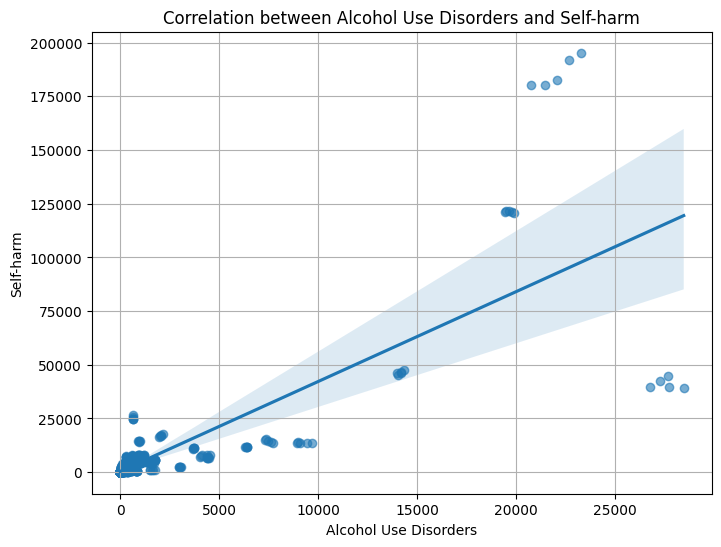

Correlation Coefficient: 0.81


In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Alcohol Use Disorders', y='Self-harm', data=filtered_df, scatter_kws={'alpha': 0.6})
plt.title('Correlation between Alcohol Use Disorders and Self-harm')
plt.xlabel('Alcohol Use Disorders')
plt.ylabel('Self-harm')
plt.grid(True)
plt.show()


correlation = filtered_df['Alcohol Use Disorders'].corr(filtered_df['Self-harm'])
print(f"Correlation Coefficient: {correlation:.2f}")

We observed a positive correlation between deaths from alcohol use disorders and deaths from self-harm. This could indicate that alcohol use disorders and self-harm share common risk factors or underlying causes, such as:

    Mental health issues (e.g., depression, anxiety),

    Socioeconomic stress (e.g., poverty, unemployment), or

    Lack of access to healthcare and support services.

### Top 5 Countries by Deaths Due to Nutritional Deficiencies & Malnutrition

C:\Users\Juan\AppData\Local\Temp\ipykernel_4576\1286918410.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



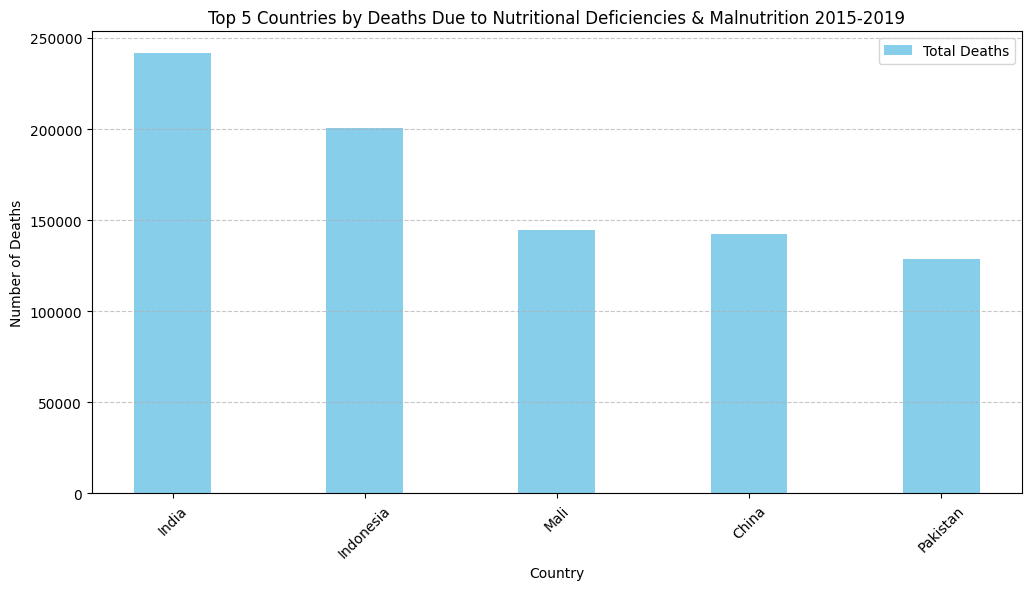

In [56]:
filtered_df['Total_Socio_Economic_Deaths'] = (filtered_df['Nutritional Deficiencies'] + filtered_df['Protein-Energy Malnutrition'])

self_harm_by_country = filtered_df.groupby('Country/Territory')['Total_Socio_Economic_Deaths'].sum()

top_5_countries = self_harm_by_country.sort_values(ascending=False).head(5)

x_labels = top_5_countries.index
x_indexes = range(len(top_5_countries))

plt.figure(figsize=(12, 6))
bar_width = 0.4
plt.bar(
    x_indexes,
    top_5_countries,
    width=bar_width,
    label='Total Deaths',
    color='skyblue'
)

plt.title('Top 5 Countries by Deaths Due to Nutritional Deficiencies & Malnutrition 2015-2019')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.xticks(x_indexes, x_labels, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


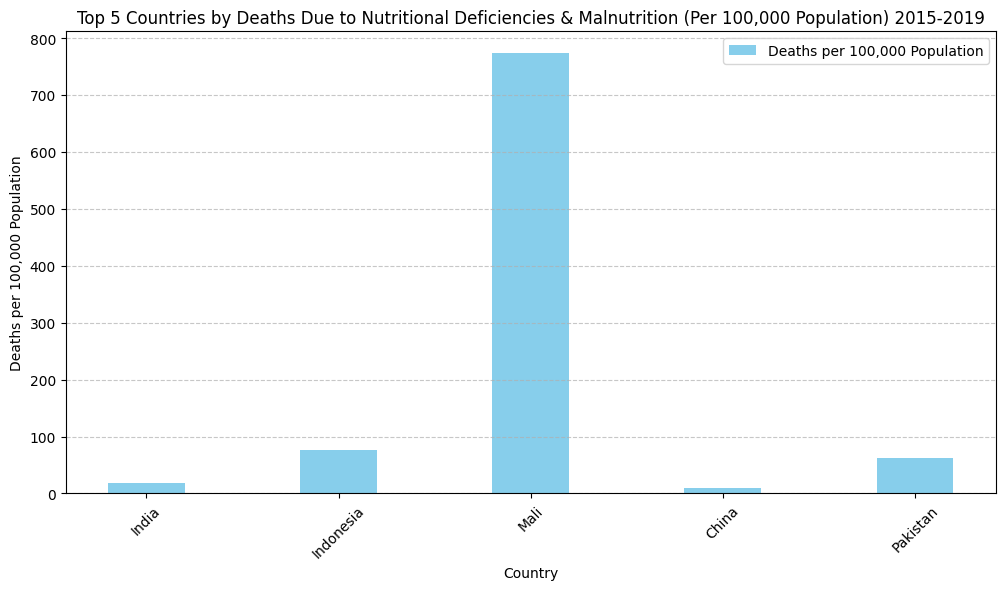

In [76]:
avg_population = {
    'India': 1338403826,
    'Indonesia': 263977694,
    'Mali': 18702964,
    'China': 1387617364,
    'Pakistan': 207950812
}

deaths_per_100k = {}

for country in top_5_countries.index:
    total_deaths = top_5_countries[country]
    population = avg_population[country]
    
    deaths_per_100k[country] = (total_deaths / population) * 100_000

deaths_per_100k_series = pd.Series(deaths_per_100k)

plt.figure(figsize=(12, 6))
bar_width = 0.4
plt.bar(
    x_indexes,
    deaths_per_100k_series,
    width=bar_width,
    label='Deaths per 100,000 Population',
    color='skyblue'
)

plt.title('Top 5 Countries by Deaths Due to Nutritional Deficiencies & Malnutrition (Per 100,000 Population) 2015-2019')
plt.xlabel('Country')
plt.ylabel('Deaths per 100,000 Population')
plt.xticks(x_indexes, x_labels, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Yearly Trend of Deaths from Substance Abuse(All Countries)

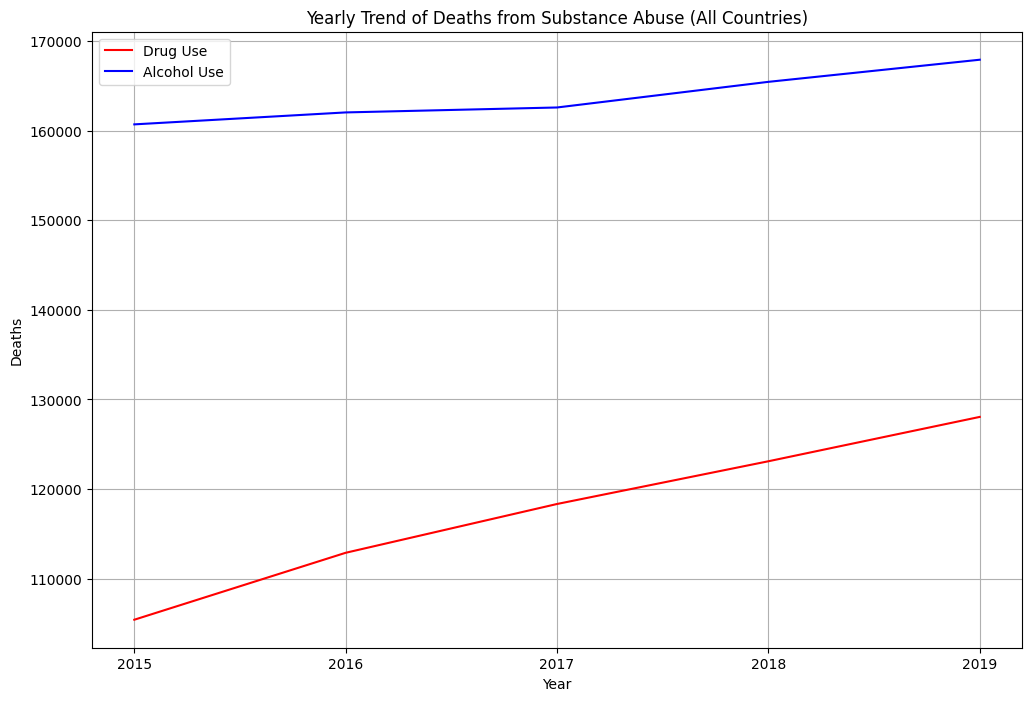

In [19]:
df_all_countries = filtered_df.groupby('Year')[['Drug Use Disorders', 'Alcohol Use Disorders']].sum().reset_index()


df_all_countries['Year'] = df_all_countries['Year'].astype(float).astype(int)  # Convert to float first, then to integer

plt.figure(figsize=(12, 8))
plt.plot(df_all_countries['Year'], df_all_countries['Drug Use Disorders'], label='Drug Use', color='red')
plt.plot(df_all_countries['Year'], df_all_countries['Alcohol Use Disorders'], label='Alcohol Use', color='blue')


plt.xticks(range(int(df_all_countries['Year'].min()), int(df_all_countries['Year'].max()) + 1))

plt.title('Yearly Trend of Deaths from Substance Abuse (All Countries)')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

### Yearly Trend of deaths from substance abuse in Canada

C:\Users\Juan\AppData\Local\Temp\ipykernel_16784\3613389983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canada['Year'] = df_canada['Year'].astype(float).astype(int)  # Convert to float first, then to integer


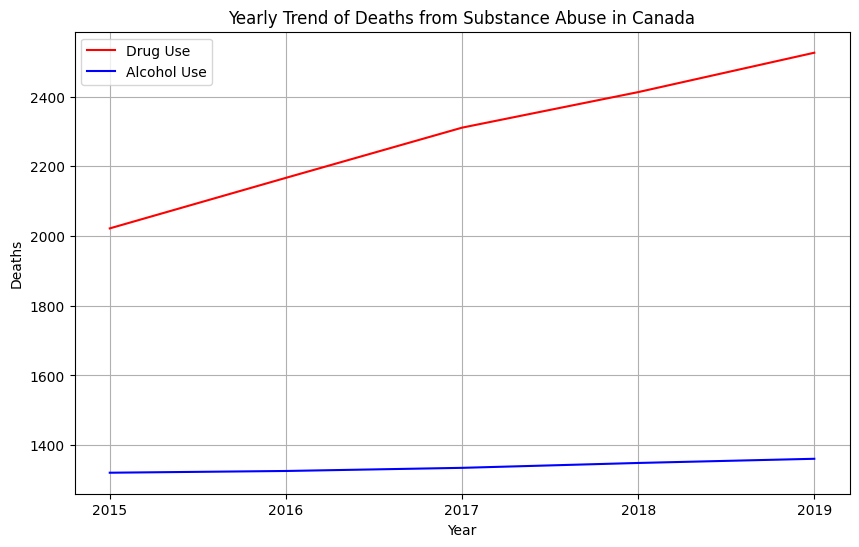

In [32]:
df_canada = filtered_df[filtered_df['Country/Territory'] == 'Canada']

df_canada['Year'] = df_canada['Year'].astype(float).astype(int)  # Convert to float first, then to integer

plt.figure(figsize=(10, 6))
plt.plot(df_canada['Year'], df_canada['Drug Use Disorders'], label='Drug Use', color='red')
plt.plot(df_canada['Year'], df_canada['Alcohol Use Disorders'], label='Alcohol Use', color='blue')

plt.xticks(range(int(df_canada['Year'].min()), int(df_canada['Year'].max()) + 1))

plt.title('Yearly Trend of Deaths from Substance Abuse in Canada')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

### Yearly Deaths from Conflict and Terrorism (Top 5 Countries)

C:\Users\Juan\AppData\Local\Temp\ipykernel_4576\2913509336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_countries['Year'] = df_top_countries['Year'].astype(float).astype(int)


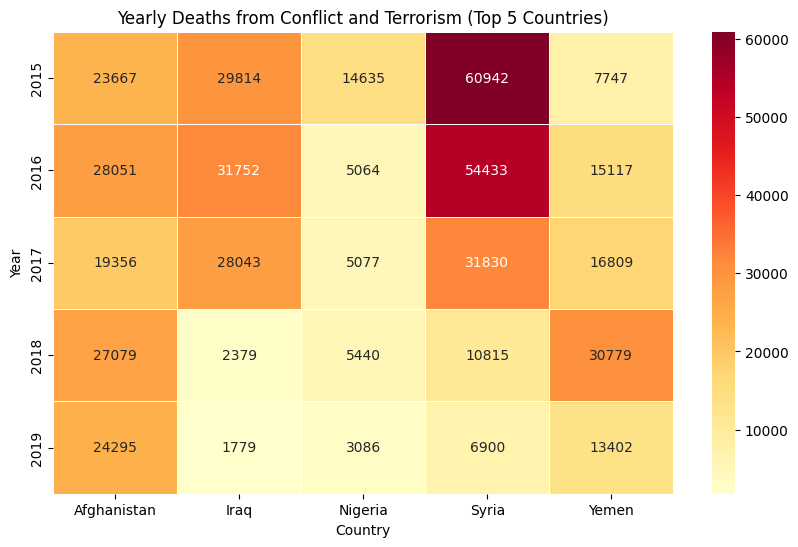

In [23]:
top_countries = filtered_df.groupby('Country/Territory')['Conflict and Terrorism'].sum().nlargest(5).index

df_top_countries = filtered_df[filtered_df['Country/Territory'].isin(top_countries)]

df_top_countries['Year'] = df_top_countries['Year'].astype(float).astype(int) 


df_pivot = df_top_countries.pivot(index='Year', columns='Country/Territory', values='Conflict and Terrorism')

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.5)

plt.title('Yearly Deaths from Conflict and Terrorism (Top 5 Countries)')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()

## Conclusion

While the topic of death can be unsettling, the data provides valuable insights into areas where meaningful change is possible. The rising rates of heart disease and self-harm emphasize the need for urgent action. Potential solutions include improving nutrition, providing better mental health support, and encouraging daily physical activity. By understanding these issues, we can begin to identify practical steps toward addressing them and ultimately make a positive impact on global health.